In [1]:
import numpy as np
import pandas as pd

from PIL import Image
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

# Load Dataset

In [2]:
trainDataDir = "dataset/two-sigma-connect-rental-listing-inquiries/trainCleanedOutlier.json.zip"

trainData = pd.read_json(trainDataDir, convert_dates=['created'])
trainData = trainData.reset_index(drop=True)
trainData

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-06-24 07:55:11,Welcome to your new home! This extravagantly o...,president street,"[Dining Room, Laundry in Building, High Speed ...",low,40.6678,7211226,-73.9398,929baf387cf71d98482a9743ab8a0890,[https://photos.renthop.com/2/7211226_7c7b8bc2...,3050,1475 president street
1,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-04-29 03:29:11,"<![CDATA[3 bedrooms, 3100, Bedford Stuyvesant/...",president street,[],low,40.6678,6941286,-73.9398,a12c733c6cba53a6d2fe8a1fdfd5a674,[https://photos.renthop.com/2/6941286_252212fd...,3100,1475 president street
2,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-17 01:22:28,"This newly renovated, queen sized 1 Bed / 1 Ba...",east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7174518,-73.9810,befc71000fbd97ffe17b1ef8566b0590,[https://photos.renthop.com/2/7174518_ac2cde58...,2850,504 east 12th street
3,1.0,3,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-08 01:12:34,"Prime East Village 3 bedroom, 1 bath apartment...",east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7122279,-73.9810,e7f859b81a2a75ac93042a721d70a0aa,[https://photos.renthop.com/2/7122279_fea77391...,4200,504 east 12th street
4,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-11 01:27:45,Welcome to your next new home.This 1BR/1BA uni...,east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7138528,-73.9810,89179891e92a87e72ac3132fc5a977e8,[https://photos.renthop.com/2/7138528_940f2e70...,2850,504 east 12th street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43523,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,west 171 street,"[Elevator, Dishwasher, Hardwood Floors]",low,40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 west 171 street
43524,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",medium,40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 broadway
43525,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 brighton 15th street,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",medium,40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 brighton 15th street
43526,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,west 21st street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",medium,40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 west 21st street


# Image Data

In [3]:
imageDir = "dataset/two-sigma-connect-rental-listing-inquiries/images_sample"

img_data = pd.DataFrame(columns = ['listing_id', 'grayscale_hist', 'avg_pixel_values'])

for file in glob.glob(imageDir + '/*/*.jpg'):
    img = Image.open(file, 'r')
    img_grayscale = img.convert('L')
    img_resize = img.resize((64, 64), Image.ANTIALIAS)
    
    file_name = os.path.basename(file)
    listing_id = pd.to_numeric(file_name.split('_')[0])
    
    grayscale_hist = list(img_grayscale.histogram())
    pixel_values = list(img_resize.getdata())
    
    R_pixel_values = list(img_resize.getdata(band=0))
    G_pixel_values = list(img_resize.getdata(band=1))
    B_pixel_values = list(img_resize.getdata(band=2))
    
    avg_pixel_values = (np.array(R_pixel_values) + np.array(G_pixel_values) + np.array(B_pixel_values)) / 3
    
    if listing_id in img_data.listing_id.values:
#         print(img_data.loc[img_data.listing_id == listing_id].grayscale_hist)
#         print(type(img_data.iloc[img_data.index[img_data.listing_id == listing_id][0]].grayscale_hist))
        idx = img_data.index[img_data.listing_id == listing_id][0]
        img_data.iloc[idx].grayscale_hist.append(grayscale_hist)
        img_data.iloc[idx].avg_pixel_values.append([avg_pixel_values])
    else:
        img_data = img_data.append({'listing_id': listing_id, 
                                    'grayscale_hist': [grayscale_hist],
                                    'avg_pixel_values': [avg_pixel_values]
                                   }, ignore_index=True)

    
# img_data['listing_id'] = pd.to_numeric(img_data['listing_id'])
display(img_data)

,listing_id,grayscale_hist,avg_pixel_values
0,6811957,"[[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 3,...","[[203.0, 201.0, 201.0, 200.0, 199.0, 198.0, 19..."
1,6811958,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[190.66666666666666, 193.66666666666666, 196...."
2,6811960,"[[0, 0, 0, 0, 0, 0, 1, 2, 4, 12, 19, 24, 56, 1...","[[221.33333333333334, 221.66666666666666, 225...."
3,6811964,"[[8, 33, 15, 10, 15, 11, 7, 9, 7, 4, 0, 3, 1, ...","[[107.0, 107.66666666666667, 108.3333333333333..."
4,6811965,"[[0, 1, 7, 4, 6, 5, 16, 18, 29, 31, 51, 73, 65...","[[79.66666666666667, 80.0, 77.0, 77.6666666666..."
...,...,...,...
76,6812257,"[[40, 57, 66, 48, 64, 62, 76, 68, 86, 81, 86, ...","[[112.0, 121.0, 100.0, 57.666666666666664, 61...."
77,6812258,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 5, 1,...","[[73.0, 73.0, 74.0, 71.0, 70.66666666666667, 7..."
78,6812263,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[130.66666666666666, 132.33333333333334, 129...."
79,6812264,"[[0, 19, 58, 124, 196, 333, 420, 542, 705, 739...","[[170.33333333333334, 177.33333333333334, 181...."


In [4]:
print(img_data.iloc[0].grayscale_hist)
print(img_data.iloc[0].avg_pixel_values)

[[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 3, 3, 0, 3, 8, 6, 6, 8, 5, 10, 5, 5, 6, 16, 14, 8, 16, 15, 10, 14, 14, 18, 6, 13, 36, 32, 32, 34, 28, 39, 46, 46, 55, 83, 102, 114, 103, 104, 122, 134, 129, 154, 192, 198, 187, 156, 188, 199, 254, 230, 202, 237, 280, 262, 259, 223, 229, 236, 248, 227, 247, 241, 237, 260, 215, 236, 262, 259, 250, 247, 283, 269, 307, 307, 321, 315, 347, 487, 669, 1002, 759, 503, 437, 460, 402, 349, 362, 361, 355, 356, 378, 383, 322, 335, 276, 256, 250, 249, 215, 194, 213, 235, 203, 210, 236, 269, 305, 320, 313, 335, 542, 895, 996, 1330, 1378, 1684, 1485, 1678, 1720, 1977, 1917, 1928, 1968, 2149, 2006, 2376, 2144, 2868, 1995, 2028, 2122, 2579, 2831, 2724, 1874, 1995, 2135, 1812, 2057, 1935, 2335, 2437, 2379, 2236, 2210, 2167, 2029, 2157, 1979, 2699, 2410, 2468, 1660, 1716, 1889, 1505, 1547, 1809, 3038, 2686, 2685, 2717, 2962, 3387, 3343, 3189, 3075, 3009, 3297, 2978, 2486, 2178, 1935, 1683, 1808, 1868, 1605, 1888, 1601, 1524, 1533, 1442, 1433, 1472, 1420, 1584, 

In [5]:
trainData = trainData.merge(img_data, on='listing_id', how='left')
# also include number of photos
trainData["num_photos"] = trainData["photos"].apply((lambda x: 0 if not x else len(x)))
trainData

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,grayscale_hist,avg_pixel_values,num_photos
0,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-06-24 07:55:11,Welcome to your new home! This extravagantly o...,president street,"[Dining Room, Laundry in Building, High Speed ...",low,40.6678,7211226,-73.9398,929baf387cf71d98482a9743ab8a0890,[https://photos.renthop.com/2/7211226_7c7b8bc2...,3050,1475 president street,NaN,NaN,8
1,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-04-29 03:29:11,"<![CDATA[3 bedrooms, 3100, Bedford Stuyvesant/...",president street,[],low,40.6678,6941286,-73.9398,a12c733c6cba53a6d2fe8a1fdfd5a674,[https://photos.renthop.com/2/6941286_252212fd...,3100,1475 president street,NaN,NaN,10
2,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-17 01:22:28,"This newly renovated, queen sized 1 Bed / 1 Ba...",east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7174518,-73.9810,befc71000fbd97ffe17b1ef8566b0590,[https://photos.renthop.com/2/7174518_ac2cde58...,2850,504 east 12th street,NaN,NaN,3
3,1.0,3,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-08 01:12:34,"Prime East Village 3 bedroom, 1 bath apartment...",east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7122279,-73.9810,e7f859b81a2a75ac93042a721d70a0aa,[https://photos.renthop.com/2/7122279_fea77391...,4200,504 east 12th street,NaN,NaN,6
4,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-11 01:27:45,Welcome to your next new home.This 1BR/1BA uni...,east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7138528,-73.9810,89179891e92a87e72ac3132fc5a977e8,[https://photos.renthop.com/2/7138528_940f2e70...,2850,504 east 12th street,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43523,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,west 171 street,"[Elevator, Dishwasher, Hardwood Floors]",low,40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 west 171 street,NaN,NaN,5
43524,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",medium,40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 broadway,NaN,NaN,5
43525,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 brighton 15th street,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",medium,40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 brighton 15th street,NaN,NaN,3
43526,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,west 21st street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",medium,40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 west 21st street,NaN,NaN,5


In [6]:
trainData[trainData['grayscale_hist'].notna()]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,grayscale_hist,avg_pixel_values,num_photos
114,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-02 01:13:38,**NO FEE**MIDTOWN EAST**D/W**Elevator** Doorma...,east 49th street,"[Doorman, Fitness Center, No Fee, Dogs Allowed...",low,40.7539,6812054,-73.9677,38e613cd90ba43943211be10168ee175,[https://photos.renthop.com/2/6812054_bc8af2f4...,3725,333 east 49th street,"[[22, 149, 145, 111, 145, 272, 433, 740, 775, ...","[[36.666666666666664, 38.666666666666664, 41.3...",3
1206,1.0,1,f51e3f6b4886bb775ab9a6a0f34ff0ef,2016-04-02 01:21:29,Beautiful one bedroom apartment like no other!...,east 69th street,"[Doorman, Dogs Allowed, Cats Allowed]",low,40.7675,6812258,-73.9607,5511bb6c502eaf88b51bac57f7ad0be7,[https://photos.renthop.com/2/6812258_a093d1c2...,3807,219 east 69th street,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 5, 1,...","[[73.0, 73.0, 74.0, 71.0, 70.66666666666667, 7...",4
1451,1.0,1,ad67f6181a49bde19218929b401b31b7,2016-04-02 01:18:55,junior 1 bedroom in financial district in a la...,wall street,"[Doorman, Fitness Center, Pre-War, Dogs Allowe...",low,40.7067,6812179,-74.0101,03fea70f5551838fed4d6fe32859efab,[https://photos.renthop.com/2/6812179_63e21862...,3535,37 wall street,"[[0, 0, 0, 1, 1, 2, 4, 9, 12, 13, 20, 16, 27, ...","[[175.66666666666666, 175.66666666666666, 177....",7
1579,1.0,1,9b24b9d24d253837fa7ee86eb436530e,2016-04-02 01:16:45,"Beautiful, completely renovated 1 bedroom apar...",west end avenue,"[Doorman, Pre-War, Laundry in Building, No Fee...",low,40.7957,6812113,-73.9727,a2f8cca8b11e7f91011ba1a62088dbfe,[https://photos.renthop.com/2/6812113_944513e9...,3125,752 west end avenue,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[122.0, 122.66666666666667, 124.3333333333333...",5
1737,1.0,2,18f6eb16d2f3e9885cb4a5d0a40791c6,2016-04-02 01:15:58,Convenient location! Close to Time Square- eas...,west 47th street,[Doorman],low,40.7586,6812103,-73.9838,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6812103_7d93a7de...,3600,150 west 47th street,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[115.33333333333333, 117.0, 117.3333333333333...",7
1837,1.0,0,39dd015bc8b81e4ae8b667357b8620b4,2016-04-02 01:16:45,BRAND NEW ON THE MARKET..........................,east 61st street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7620,6812112,-73.9636,e50d99e3da5ad420b1c2eb06309ad061,[https://photos.renthop.com/2/6812112_c8ef3376...,1900,257 east 61st street,"[[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 8, 19, 41, 62,...","[[91.66666666666667, 91.66666666666667, 92.333...",3
1863,2.0,3,b9fc2e28ae7139b781eaac8d1f792804,2016-04-02 01:14:46,Renovated 4 Bedroom with 2 full bath in elevat...,riverside drive,"[Pre-War, No Fee, Dogs Allowed, Cats Allowed]",low,40.8274,6812083,-73.9514,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6812083_109c02eb...,4475,684 riverside drive,"[[167, 224, 195, 259, 265, 286, 304, 304, 358,...","[[163.0, 163.0, 162.66666666666666, 163.333333...",8
2045,1.0,1,f817612aa5f5c25516b52384ecd384d8,2016-04-02 01:18:04,Doorman/Elevator Building With On Site Fitness...,amsterdam avenue,"[No Fee, Dogs Allowed, Cats Allowed]",low,40.7976,6812154,-73.9680,3813434aabfbad659a45f86a740cd23f,[https://photos.renthop.com/2/6812154_94dfc464...,3350,850 amsterdam avenue,"[[5, 17, 21, 25, 30, 21, 24, 34, 34, 32, 33, 2...","[[224.0, 228.33333333333334, 233.0, 235.666666...",2
2387,1.0,1,ff042714a26de9f1ccc1d1a683767740,2016-04-02 01:13:48,AMAZING LOCATION! NO FEE!Murray Hill/Midtown D...,east 39th street,"[Doorman, Fitness Center, Pre-War, Dogs Allowe...",low,40.7489,6812061,-73.9765,044573b60ce5da02f510e49f086707ec,[https://photos.renthop.com/2/6812061_27288074...,3350,150 east 39th street,"[[0, 0, 0, 0, 1, 15, 18, 10, 15, 11, 15, 13, 1...","[[47.0, 48.333333333333336, 46.666666666666664...",11
2416,1.0,2,f89cc21cdd3ab61b964856da1fa7e4b0,2016-

# Text Data

### Feature Extraction

In [7]:
trainData['desc_word_count'] = trainData['description'].apply(lambda x: len(str(x).split(" ")))
trainData['desc_char_count'] = trainData['description'].str.len()

trainData[['desc_word_count', 'desc_char_count']]

,desc_word_count,desc_char_count
0,183,1276
1,44,372
2,32,224
3,62,390
4,134,756
...,...,...
43523,131,852
43524,70,552
43525,81,550
43526,118,845


In [8]:
def avg_word(sentence):
    words = sentence.split()
    if (len(words) == 0):
        return 0
    
    return (sum(len(word) for word in words)/len(words))

trainData['desc_avg_word_length'] = trainData['description'].apply(lambda x: avg_word(x))
trainData[['desc_avg_word_length']]

,desc_avg_word_length
0,6.044199
1,7.477273
2,6.225806
3,5.393443
4,4.684211
...,...
43523,5.596899
43524,6.971014
43525,5.949367
43526,6.385965


In [9]:
def count_non_alpha_num(str):
    return sum(1 - (s.isalpha() or s == " ") for s in str)

trainData['desc_special_char_count'] = trainData['description'].apply(lambda x: count_non_alpha_num(x))
trainData[['description', 'desc_special_char_count']]

,description,desc_special_char_count
0,Welcome to your new home! This extravagantly o...,66
1,"<![CDATA[3 bedrooms, 3100, Bedford Stuyvesant/...",86
2,"This newly renovated, queen sized 1 Bed / 1 Ba...",30
3,"Prime East Village 3 bedroom, 1 bath apartment...",15
4,Welcome to your next new home.This 1BR/1BA uni...,22
...,...,...
43523,There is 700 square feet of recently renovated...,46
43524,"2 bedroom apartment with updated kitchen, rece...",64
43525,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,74
43526,Wonderful Bright Chelsea 2 Bedroom apartment o...,67


In [10]:
trainData['desc_num_count'] = trainData['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
trainData['desc_upper_count'] = trainData['description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
trainData[['description', 'desc_num_count', 'desc_upper_count']]

,description,desc_num_count,desc_upper_count
0,Welcome to your new home! This extravagantly o...,3,2
1,"<![CDATA[3 bedrooms, 3100, Bedford Stuyvesant/...",1,3
2,"This newly renovated, queen sized 1 Bed / 1 Ba...",2,0
3,"Prime East Village 3 bedroom, 1 bath apartment...",2,1
4,Welcome to your next new home.This 1BR/1BA uni...,2,2
...,...,...,...
43523,There is 700 square feet of recently renovated...,1,0
43524,"2 bedroom apartment with updated kitchen, rece...",1,0
43525,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,2,3
43526,Wonderful Bright Chelsea 2 Bedroom apartment o...,1,0


### Data Preprocessing

#### Convert to lower case and remove punctuation

In [11]:
trainData['description'] = trainData['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
trainData['description'] = trainData['description'].str.replace('[^\w\s]','')

trainData[['description']]

,description
0,welcome to your new home this extravagantly ou...
1,cdata3 bedrooms 3100 bedford stuyvesantbushwic...
2,this newly renovated queen sized 1 bed 1 bath...
3,prime east village 3 bedroom 1 bath apartment ...
4,welcome to your next new homethis 1br1ba unit ...
...,...
43523,there is 700 square feet of recently renovated...
43524,2 bedroom apartment with updated kitchen recen...
43525,no brokers fee never lived 1 bedroom 1 bathro...
43526,wonderful bright chelsea 2 bedroom apartment o...


#### Remove common and rare words

In [12]:
word_counts = pd.Series(' '.join(trainData['description']).split()).value_counts()

freq = word_counts[:10]
rare = word_counts[-10:]
freq_list = list(freq.index)
rare_list = list(rare.index)

trainData['description'] = trainData['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_list and x not in rare_list))

print(freq_list)
print(rare_list)
trainData[['description']]

['and', 'br', 'the', 'a', 'to', 'in', 'with', 'of', 'is', 'this']
['renovatedrooftop', 'utilitiesgroceries', 'nearbybrshopping', 'shoppingrnfilling', 'deckbe', 'sunlightgaragestorage', 'districtrockefeller', 'samanthas', 'topsmicrowavehardwood', 'includedequal']


,description
0,welcome your new home extravagantly outfitted ...
1,cdata3 bedrooms 3100 bedford stuyvesantbushwic...
2,newly renovated queen sized 1 bed 1 bath unit ...
3,prime east village 3 bedroom 1 bath apartment ...
4,welcome your next new homethis 1br1ba unit loc...
...,...
43523,there 700 square feet recently renovated space...
43524,2 bedroom apartment updated kitchen recently i...
43525,no brokers fee never lived 1 bedroom 1 bathroo...
43526,wonderful bright chelsea 2 bedroom apartment o...


#### Remove stop words

In [13]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
display(stopwords.words('english'))

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
stop_list = stopwords.words('english')
trainData['description'] = trainData['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_list))

trainData[['description']]

,description
0,welcome new home extravagantly outfitted 3 bed...
1,cdata3 bedrooms 3100 bedford stuyvesantbushwic...
2,newly renovated queen sized 1 bed 1 bath unit ...
3,prime east village 3 bedroom 1 bath apartment ...
4,welcome next new homethis 1br1ba unit located ...
...,...
43523,700 square feet recently renovated space beaut...
43524,2 bedroom apartment updated kitchen recently i...
43525,brokers fee never lived 1 bedroom 1 bathroom p...
43526,wonderful bright chelsea 2 bedroom apartment q...


#### Count number of features for each listing

In [15]:
trainData['num_features'] = trainData['features'].apply(lambda x: len(x))

#### Extract year, month, date to their individual columns

In [16]:
trainData['year'] = trainData['created'].dt.year
trainData['month'] = trainData['created'].dt.month
trainData['day'] = trainData['created'].dt.day

In [17]:
trainData

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,desc_word_count,desc_char_count,desc_avg_word_length,desc_special_char_count,desc_num_count,desc_upper_count,num_features,year,month,day
0,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-06-24 07:55:11,welcome new home extravagantly outfitted 3 bed...,president street,"[Dining Room, Laundry in Building, High Speed ...",low,40.6678,7211226,...,183,1276,6.044199,66,3,2,8,2016,6,24
1,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-04-29 03:29:11,cdata3 bedrooms 3100 bedford stuyvesantbushwic...,president street,[],low,40.6678,6941286,...,44,372,7.477273,86,1,3,0,2016,4,29
2,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-17 01:22:28,newly renovated queen sized 1 bed 1 bath unit ...,east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7174518,...,32,224,6.225806,30,2,0,3,2016,6,17
3,1.0,3,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-08 01:12:34,prime east village 3 bedroom 1 bath apartment ...,east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7122279,...,62,390,5.393443,15,2,1,3,2016,6,8
4,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-11 01:27:45,welcome next new homethis 1br1ba unit located ...,east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7138528,...,134,756,4.684211,22,2,2,3,2016,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43523,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,700 square feet recently renovated space beaut...,west 171 street,"[Elevator, Dishwasher, Hardwood Floors]",low,40.8433,6824800,...,131,852,5.596899,46,1,0,3,2016,4,5
43524,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,2 bedroom apartment updated kitchen recently i...,broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",medium,40.8198,6813268,...,70,552,6.971014,64,1,0,7,2016,4,2
43525,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,brokers fee never lived 1 bedroom 1 bathroom p...,210 brighton 15th street,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",medium,40.5765,6927093,...,81,550,5.949367,74,2,3,11,2016,4,26
43526,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,wonderful bright chelsea 2 bedroom apartment q...,west 21st street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",medium,40.7448,6892816,...,118,845,6.385965,67,1,0,5,2016,4,19


In [18]:
trainDataTextExtract = "dataset/two-sigma-connect-rental-listing-inquiries/trainTextExtract.json.zip"
trainData.to_json(trainDataTextExtract)

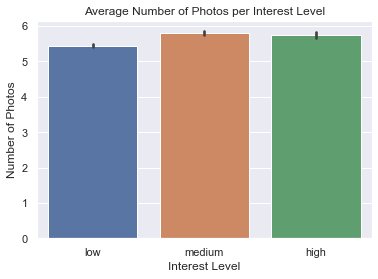

In [20]:
sns.barplot(x="interest_level", y="num_photos", order=['low', 'medium', 'high'], data=trainData)
plt.title("Average Number of Photos per Interest Level")
plt.xlabel('Interest Level')
plt.ylabel('Number of Photos')
plt.savefig("figures_saved/histogram_photos-interest")

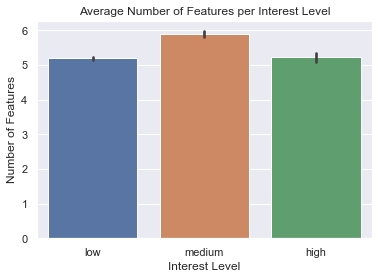

In [21]:
sns.barplot(x="interest_level", y="num_features", order=['low', 'medium', 'high'], data=trainData)
plt.title("Average Number of Features per Interest Level")
plt.xlabel('Interest Level')
plt.ylabel('Number of Features')
plt.savefig("figures_saved/histogram_features-interest")